# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №2: Линейные модели


###### <hr\>
**Общая информация**

**Срок сдачи:** 05 апреля 18:00 Сдача **очная** на онлайн занятии. <br\>


Используйте данный Ipython Notebook при оформлении домашнего задания.

Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0920, Задание 2] Фамилия Имя.



**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw2.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст, если явно не указана такая возможность. В противном случае -1 балл
<hr\>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

Здравствуйте, уважаемые студенты! 

В этом задании мы будем реализовать линейные модели. Необходимо реализовать линейную и логистическую регрессии с L2 регуляризацией

# Теоретическое введение



Линейная регрессия решает задачу регрессии и оптимизирует функцию потерь MSE 

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right], $$ где $y_i$ $-$ целевая функция,  $a_i = a(x_i) =  \langle\,x_i,w\rangle ,$ $-$ предсказание алгоритма на объекте $x_i$, $w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Не забываем, что здесь и далее  мы считаем, что в $x_i$ есть тождественный вектор единиц, ему соответствует вес $w_0$.


Логистическая регрессия является линейным классификатором, который оптимизирует так называемый функционал log loss:

$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right],$$
где  $y_i  \in \{0,1\}$ $-$ метка класса, $a_i$ $-$ предсказание алгоритма на объекте $x_i$. Модель пытается предсказать апостериорую вероятность объекта принадлежать к классу "1":
$$ p(y_i = 1 | x_i) = a(x_i) =  \sigma( \langle\,x_i,w\rangle ),$$
$w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Функция $\sigma(x)$ $-$ нелинейная функция, пероводящее скалярное произведение объекта на веса в число $\in (0,1)$ (мы же моделируем вероятность все-таки!)

$$\sigma(x) = \frac{1}{1 + \exp(-x)}$$

Если внимательно посмотреть на функцию потерь, то можно заметить, что в зависимости от правильного ответа алгоритм штрафуется или функцией $-\log a_i$, или функцией $-\log (1 - a_i)$.



Часто для решения проблем, которые так или иначе связаны с проблемой переобучения, в функционал качества добавляют слагаемое, которое называют ***регуляризацией***. Итоговый функционал для линейной регрессии тогда принимает вид:

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right] + \frac{1}{C}R(w) $$

Для логистической: 
$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right] +  \frac{1}{C}R(w)$$

Самое понятие регуляризации введено основателем ВМК академиком Тихоновым https://ru.wikipedia.org/wiki/Метод_регуляризации_Тихонова

Идейно методика регуляризации заключается в следующем $-$ мы рассматриваем некорректно поставленную задачу (что это такое можно найти в интернете), для того чтобы сузить набор различных вариантов (лучшие из которых будут являться переобучением ) мы вводим дополнительные ограничения на множество искомых решений. На лекции Вы уже рассмотрели два варианта регуляризации.

$L1$ регуляризация:
$$R(w) = \sum_{j=1}^{D}|w_j|$$
$L2$ регуляризация:
$$R(w) =  \sum_{j=1}^{D}w_j^2$$

С их помощью мы ограничиваем модель в  возможности выбора каких угодно весов минимизирующих наш лосс, модель уже не сможет подстроиться под данные как ей угодно. 

Вам нужно добавить соотвествущую Вашему варианту $L2$ регуляризацию.

И так, мы поняли, какую функцию ошибки будем минимизировать, разобрались, как получить предсказания по объекту и обученным весам. Осталось разобраться, как получить оптимальные веса. Для этого нужно выбрать какой-то метод оптимизации.



Градиентный спуск является самым популярным алгоритмом обучения линейных моделей. В этом задании Вам предложат реализовать стохастический градиентный спуск или  мини-батч градиентный спуск (мини-батч на русский язык довольно сложно перевести, многие переводят это как "пакетный", но мне не кажется этот перевод удачным). Далее нам потребуется определение **эпохи**.
Эпохой в SGD и MB-GD называется один проход по **всем** объектам в обучающей выборки.
* В SGD градиент расчитывается по одному случайному объекту. Сам алгоритм выглядит примерно так:
        1) Перемешать выборку
        2) Посчитать градиент функции потерь на одном объекте (далее один объект тоже будем называть батчем)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* В Mini Batch SGD - по подвыборке объектов. Сам алгоритм выглядит примерно так::
        1) Перемешать выборку, выбрать размер мини-батча (от 1 до размера выборки)
        2) Почитать градиент функции потерь по мини-батчу (не забыть поделить на  число объектов в мини-батче)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* Для отладки алгоритма реализуйте возможность  вывода средней ошибки на обучении модели по объектам (мини-батчам). После шага градиентного спуска посчитайте значение ошибки на объекте (или мини-батче), а затем усредните, например, по ста шагам. Если обучение проходит корректно, то мы должны увидеть, что каждые 100 шагов функция потерь уменьшается. 
* Правило останова - максимальное количество эпох
    


# Теоретические вопросы (2 балла)
В этой части Вам будут предложены теоретичские вопросы и задачи по теме. Вы, конечно, можете списать их у своего товарища или найти решение в интернете, но учтите, что они обязательно войдут в теоретический коллоквиум. Лучше разобраться в теме сейчас и успешно ответить на коллоквиуме, чем списать, не разобравшись в материале, и быть терзаемым совестью. 


Формулы надо оформлять в формате **LaTeX**.

Задача 1. Градиент для линейной регрессии.
* Выпишите формулу обновления весов для линейной регрессии с L2 регуляризацией для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент?

***Ваше решение здесь***

$$\nabla_{w}L(w) = \nabla_{w}\left[\frac{1}{N}\sum_i(y_i - <x_i, w>)^2+\frac{1}{C}\sum_{j=1}^{n}w_j^2\right] = $$
$$ = \nabla_{w}\left[\frac{1}{N}\|y-X\cdot w\|^2+\frac{1}{C}ww^T\right] = \frac{1}{N}\nabla_{w}(y^Ty-w^TX^Ty-y^TX^Tw+w^TX^TXw)+\frac{2w}{C}=$$
$$ = \frac{2}{N}X^T(X\cdot w-y)+\frac{2}{C}w = -\frac{2}{N}\sum_{i=1}^{N}x_i(y_i - <x_i,w>)+\frac{2}{C}w$$
Подставим полученный градиент в формулу для обновления весов
$$ w_{new} = w_{old} - \alpha(-\frac{2}{N}\sum_{i=1}^{N}x_i(y_i-<x_i,w_{old}>)+\frac{2}{C}w_{old})$$

Задача 2. Градиент для логистической регрессии.
* Выпишите формулу обновления весов для логистической регрессии с L2 регуляризацией  для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент? Как соотносится этот градиент с градиентом, возникающий в задаче линейной регрессии?

Подсказка: Вам градиент, которой получается если “в лоб” продифференцировать,  надо немного преобразовать.
Надо подставить, что $1 - \sigma(w,x) $ это  $1 - a(x_i)$, а  $-\sigma(w,x)$ это $0 - a(x_i)$.  Тогда получится свести к одной красивой формуле с линейной регрессией, которую программировать будет намного проще.

***Ваше решение здесь***

$$\frac{d\sigma}{dx}=\frac{e^{-x}}{(1+e^{-x})^2}=(\frac{1}{1+e^{-x}})(\frac{e^{-x}}{1+e^{-x}})=\sigma(x)(1-\sigma(x))$$

$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right] +  \frac{1}{C}R(w)$$
$$\nabla_{w}L(w) = -\frac{1}{N}\sum_{i}x_i\left[\frac{y_i\sigma(1-\sigma)}{\sigma}-\frac{(1-y_i)\sigma(1-\sigma)}{(1-\sigma)}\right]+\frac{2}{C}w_{old}=$$
$$=\frac{1}{N}\left[\sum_{i}x_i(\sigma(x_i, w)-y_i)\right] +\frac{2}{C}w$$
Подставим в формулу для обновления весов, получим:
$$w_{new} = w_{old} -\alpha(\frac{1}{N}\left[\sum_{i}x_i(\sigma(x_i, w_{old})-y_i)\right] +\frac{2}{C}w_{old})$$

Задача 3. Точное решение линейной регрессии

На лекции было показано, что точное решение линейной регрессии имеет вид $w = (X^TX)^{-1}X^TY $. 
* Покажите, что это действительно является точкой минимума в случае, если матрица X имеет строк не меньше, чем столбцов и имеет полный ранг. Подсказка: посчитайте Гессиан и покажите, что в этом случае он положительно определен. 
* Выпишите точное решение для модели с $L2$ регуляризацией. Как L2 регуляризация помогает с точным решением где матрица X имеет линейно зависимые признаки?

***Ваше решение здесь***

Минимум достигается при равенстве градиента нулю и положительной определенности Гессиана
$$\nabla_{w}L(w) =\frac{2}{N}X^T(X\cdot w-y)$$
$$Hesse(L(w)) = \nabla_{w}^2L(w)=\nabla_{w}(\frac{2}{N}X^T(X\cdot w-y))=\frac{2}{N}XX^T$$
Покажем, что $XX^T$ положительно определена:
$$aXX^Ta^T = aX(X^Ta^T)^T= <aX,aX> =\|aX\|^2\geq0$$
Поскольку $X$ имеет полный ранг, $aX=0$ только при $x=0$, значит $\forall a\neq 0$,  $aXX^Ta^T>0$. 
Значит, в $w$ действительно достигается минимум.

Ищем точное решение для l2 регуляризации:
$$ \nabla_{w}L(w) =\frac{1}{N}X^T(X\cdot w-y)+\frac{2}{C}w =0$$
$$ (XX^T+\frac{2N}{C})\cdot w = X^T\cdot y$$
$$ w = (XX^T+\frac{2N}{C})^{-1}X^Ty$$
Регуляризация позволяет бороться с нулевыми и близкими к нулю собственными числами матрицы X. При остутствии регуляризации
веса будут очень большими по модулю, и небольшие изменения признаков будут приводить к значительным отклонениям целевой переменной.

Задача 4.  Предсказываем вероятности.

Когда говорят о логистической регрессии, произносят фразу, что она "предсказывает вероятности положительного класса". Давайте разберемся, что же за этим стоит. Посчитаем математическое ожидание функции потерь и проверим, что предсказание алгоритма, оптимизирующее это мат. ожидание, будет являться вероятностью положительного класса. 

И так, функция потерь на объекте $x_i$, который имеет метку $y_i \in \{0,1\}$  для предсказания $a(x_i)$ равна:
$$L(y_i, b) =-[y_i == 1] \log a(x_i)  - [y_i == 0] \log(1 - a(x_i)) $$

Где $[]$ означает индикатор $-$ он равен единице, если значение внутри него истинно, иначе он равен нулю. Тогда мат. ожидание при условии конкретного $x_i$  по определение мат. ожидания дискретной случайной величины:
$$E(L | x_i) = -p(y_i = 1 |x_i ) \log a(x_i)  - p(y_i = 0 | x_i) \log( 1 - a(x_i))$$
* Докажите, что значение $a(x_i)$, минимизирующее данное мат. ожидание, в точности равно $p(y_i = 1 |x_i)$, то есть равно вероятности положительного класса.

Подсказка: возможно, придется воспользоваться, что  $p(y_i = 1 | x_i) + p(y_i = 0 | x_i) = 1$

***Ваше решение здесь***

Продиффиренцируем матожидание по $a(x_i)$:
$$\frac{dE}{da(x_i)} = -\frac{p(y_i=1|x_i)}{a(x_i)}+\frac{1-p(y_i=1|x_i)}{1-a(x_i)}=\frac{a(x_i)-p(y_i=1|x_i)}{(1-a(x_i))a(x_i)}$$

Показали, что $a(x_i) = p(y_i=1|x_i)$ - точка экстремума. Покажем, что она же - точка минимума.

$$\frac{d^{2}E}{da^2(x_i)} = \frac{(1-a(x_i))a(x_i) - (a(x_i)-p(y_i=1|x_i))(1-2a(x_i))}{(1-a(x_i))^2a(x_i)^2}
=\frac{a(x_i)^2+p(y_i=1|x_i)(1-2a(x_i))}{(1-a(x_i))^2a(x_i)^2}$$

Подставим исследуемую точку во вторую производную, получим:
$$\frac{d^{2}E}{da^2(x_i)}_{p(y_i=1|x_i)}=\frac{1}{(1-p(y_i=1|x_i))p(y_i=1|x_i)}=\frac{1}{p(y_i=0|x_i)p(y_i=1|x_i)} > 0$$

Задача 5.  Смысл регуляризации.

Нужно ли в L1/L2 регуляризации использовать свободный член $w_0$ (который не умножается ни на какой признак)?

Подсказка: подумайте, для чего мы вводим $w_0$

***Ваше решение здесь***

Свободный коэффициент $w_0$ нет смысла регуляризировать - если мы будем штрафовать за его величину, то получится, что мы учитываем некие априорные представления о близости целевой переменной к нулю и отсутствии необходимости в учете ее смещения, что может быть неверным

#  Реализация линейной модели (4 балла)

## Зачем нужны батчи?


Как Вы могли заметить из теоретического введения, что в случае SGD, что в случа mini-batch GD,  на каждой итерации обновление весов  происходит только по небольшой части данных (1 пример в случае SGD, batch примеров в случае mini-batch). То есть для каждой итерации нам *** не нужна вся выборка***. Мы можем просто итерироваться по выборке, беря батч нужного размера (далее 1 объект тоже будем называть батчом).

Легко заметить, что в этом случае нам не нужно загружать все данные в оперативную память, достаточно просто считать батч с диска, обновить веса, считать диска другой батч и так далее. В целях упрощения домашней работы, прямо с диска  мы считывать не будем, будем работать с обычными numpy array. 





## Немножко про генераторы в Python



Идея считывания данных кусками удачно ложится на так называемые ***генераторы*** из языка Python. В данной работе Вам предлагается не только разобраться с логистической регрессией, но  и познакомиться с таким важным элементом языка.  При желании Вы можете убрать весь код, связанный с генераторами, и реализовать логистическую регрессию и без них, ***штрафоваться это никак не будет***. Главное, чтобы сама модель была реализована правильно, и все пункты были выполнены. 

Подробнее можно почитать вот тут https://anandology.com/python-practice-book/iterators.html


К генератору стоит относиться просто как к функции, которая порождает не один объект, а целую последовательность объектов. Новое значение из последовательности генерируется с помощью ключевого слова ***yield***. Ниже Вы можете насладиться  генератором чисел Фибоначчи.

In [2]:
def fib(max_iter=4):
    a, b = 0, 1
    iter_num = 0
    while 1:
        yield a
        a, b = b, a + b
        iter_num += 1
        if iter_num == max_iter:
            break

Вот так можно сгенерировать последовательность Фибоначчи. 

Заметьте, что к генераторам можно применять некоторые стандартные функции из Python, например enumerate.

In [3]:
new_generator = fib()
for j, fib_val in enumerate(new_generator):
    print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Пересоздавая объект, можно сколько угодно раз генерировать заново последовательность. 

In [4]:
for i in range(0, 3):
    new_generator = fib()
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


А вот так уже нельзя.

In [5]:
new_generator = fib()
for i in range(0, 3):
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Концепция крайне удобная для обучения  моделей $-$ у Вас есть некий источник данных, который Вам выдает их кусками, и Вам совершенно все равно откуда он их берет. Под ним может скрывать как массив в оперативной памяти, как файл на жестком диске, так и SQL база данных. Вы сами данные никуда не сохраняете, оперативную память экономите.

Если Вам понравилась идея с генераторами, то Вы можете реализовать свой, используя прототип batch_generator. В нем Вам нужно выдавать батчи признаков и ответов для каждой новой итерации спуска. Если не понравилась идея, то можете реализовывать SGD или mini-batch GD без генераторов.

In [6]:
%load_ext pycodestyle_magic

In [7]:
def batch_generator(X, y, shuffle=True, batch_size=1):
    """
    Гератор новых батчей для обучения
    X          - матрица объекты-признаки
    y_batch    - вектор ответов
    shuffle    - нужно ли случайно перемешивать выборку
    batch_size - размер батча ( 1 это SGD, > 1 mini-batch GD)
    Генерирует подвыборку для итерации спуска (X_batch, y_batch)
    """
    
    y_shape = y.shape[0]
    num_batch = y.shape[0]//batch_size
    index = np.arange(0, y_shape)
    if shuffle == True:
        np.random.shuffle(index)
    X_batch = None
    y_batch = None
    for i in range(0, num_batch):
        X_batch = X[index[batch_size*i : batch_size*(i+1)], :]
        y_batch = y[index[batch_size*i : batch_size*(i+1)]]
        yield (X_batch, y_batch)

# Теперь можно сделать генератор по данным ()
#  my_batch_generator = batch_generator(X, y, shuffle=True, batch_size=1):

In [8]:
#%%pycodestyle

def sigmoid(x):
    """
    Вычисляем значение сигмоида.
    X - выход линейной модели
    """

    if isinstance(x, np.ndarray):
        x_temp = x.sum()
    else:
        x_temp = x
    sigm_value_x = 1.0/(1.0 + np.exp(-x_temp) + 0.00001)
    return sigm_value_x

from sklearn.base import BaseEstimator, ClassifierMixin


class MySGDClassifier(BaseEstimator, ClassifierMixin):

    def __init__(self, batch_generator, C=1, alpha=0.01, max_epoch=10, model_type='lin_reg', batch_size=1):
        """
        batch_generator -- функция генератор, которой будем создавать батчи
        C - коэф. регуляризации
        alpha - скорость спуска
        max_epoch - максимальное количество эпох
        model_type - тим модели, lin_reg или log_reg
        """

        self.C = C
        self.alpha = alpha
        self.max_epoch = max_epoch
        self.batch_generator = batch_generator
        self.errors_log = {'iter': [], 'loss': []}
        self.model_type = model_type
        self.batch_size = batch_size

    def calc_loss(self, X_batch, y_batch):
        """
        Считаем функцию потерь по батчу
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """

        mult = 1/y_batch.shape[0]
        resh_y = y_batch.reshape(-1, 1)
        right_shape_weights = self.weights.reshape(-1, 1)
        if self.model_type == 'lin_reg':
            temp = (resh_y - np.dot(X_batch, right_shape_weights))
            temp = temp**2
            loss = temp.sum()*mult
            loss = loss + (right_shape_weights**2).sum()/self.C
        elif self.model_type == 'log_reg':
            temp = X_batch*right_shape_weights.reshape(1, -1)
            a = np.apply_along_axis(sigmoid, arr=temp, axis=1)
            temp = y_batch*np.log(a + 0.00001) + (1.0 - y_batch)*np.log(1.0 - a + 0.00001)
            loss = -1.0*temp.sum()*mult
            loss = loss + (right_shape_weights**2).sum()/self.C
        return loss

    def calc_loss_grad(self, X_batch, y_batch):
        """
        Считаем  градиент функции потерь по батчу (то что Вы вывели в задании 1)
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """

        right_shape_weights = self.weights.reshape(-1, 1)
        resh_y = y_batch.reshape(-1, 1)
        if self.model_type == 'lin_reg':
            mult = - 2.0/y_batch.shape[0]
            temp = (resh_y - (X_batch*self.weights).sum(axis=1).reshape(-1, 1))
            temp = (X_batch.T*temp.T).sum(axis=1).reshape(-1, 1)
            loss_grad = temp*mult + 2*right_shape_weights/self.C
        elif self.model_type == 'log_reg':
            mult = - 1.0/y_batch.shape[0]
            temp = X_batch*right_shape_weights.reshape(1, -1)
            temp = np.apply_along_axis(sigmoid, arr=temp, axis=1)
            temp = temp.reshape(-1, 1)
            temp = resh_y - temp
            temp = (X_batch.T*temp.T).sum(axis=1).reshape(-1, 1)
            loss_grad = temp*mult + 2*right_shape_weights/self.C
        return loss_grad

    def update_weights(self, new_grad):
        """
        Обновляем вектор весов
        new_grad - градиент по батчу
        """

        self.weights = self.weights - (self.alpha*new_grad).reshape(1, -1)

    def fit(self, X, y):
        '''
        Обучение модели
        X - матрица объекты-признаки
        y - вектор ответов
        '''

        # Нужно инициализровать случайно веса
        V0 = np.ones(X.shape[0])[:, np.newaxis]
        X = np.hstack((V0, X))
        btc = self.batch_size
        self.weights = np.random.random(X.shape[1])
        for n in range(0, self.max_epoch):
            new_epoch_generator = self.batch_generator(X, y, batch_size=btc)
            for batch_num, new_batch in enumerate(new_epoch_generator):
                X_batch = new_batch[0]
                y_batch = new_batch[1]
                batch_loss = self.calc_loss(X_batch, y_batch)
                batch_grad = self.calc_loss_grad(X_batch, y_batch)
                self.update_weights(batch_grad)
                # Подумайте в каком месте стоит посчитать ошибку для отладки модели
                # До градиентного шага или после
                # batch_loss = self.calc_loss(X_batch, y_batch)
                self.errors_log['iter'].append(batch_num)
                self.errors_log['loss'].append(batch_loss)

        return self

    def predict(self, X):
        '''
        Предсказание класса
        X - матрица объекты-признаки
        Не забудте тип модели (линейная или логистическая регрессия)!
        '''

        V0 = np.ones(X.shape[0])[:, np.newaxis]
        X = np.hstack((V0, X))
        if self.model_type == 'lin_reg':
            y_hat = np.dot(X, self.weights.T).ravel()
        else:
            temp = X*self.weights
            y_hat = np.apply_along_axis(sigmoid, arr=temp, axis=1)

        # Желательно здесь использовать матричные операции между X и весами, например, numpy.dot
        return y_hat

Запустите обе регрессии на синтетических данных. 


Выведите полученные веса и нарисуйте разделяющую границу между классами (используйте только первых два веса для первых двух признаков X[:,0], X[:,1] для отображения в 2d пространство ).  

In [9]:
def plot_decision_boundary(clf):
    weights = clf.weights.ravel()[:3]
    x = np.arange(-3, 6, 0.5)
    lb = clf.model_type
    plt.plot(x, (0.5 - weights[1] * x - weights[0]) / weights[2], label=lb)

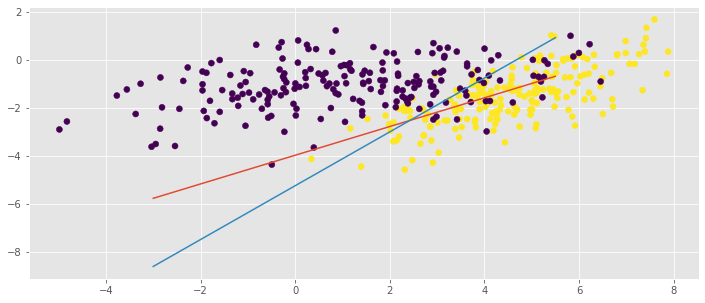

In [10]:
np.random.seed(0)

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), np.zeros(200)]

your_model1 = MySGDClassifier(batch_generator, C=1000, model_type='lin_reg')
your_model1.fit(X, y)
plot_decision_boundary(your_model1)

your_model = MySGDClassifier(batch_generator, C=1000, model_type='log_reg')
your_model.fit(X, y)
plot_decision_boundary(your_model)

plt.scatter(X[:, 0], X[:, 1], c=y)

Далее будем анализировать Ваш алгоритм. 
Для этих заданий используйте датасет ниже.

In [11]:
from sklearn.datasets import make_classification

In [12]:
X, y = make_classification(n_samples=100000, n_features=10, 
                           n_informative=4, n_redundant=0, 
                           random_state=123, class_sep=1.0,
                           n_clusters_per_class=1)

Покажите сходимости обеих регрессией на этом датасете: изобразите график  функции потерь, усредненной по $N$ шагам градиентого спуска, для разных `alpha` (размеров шага). Разные `alpha` расположите на одном графике. 

$N$ можно брать 10, 50, 100 и т.д. 

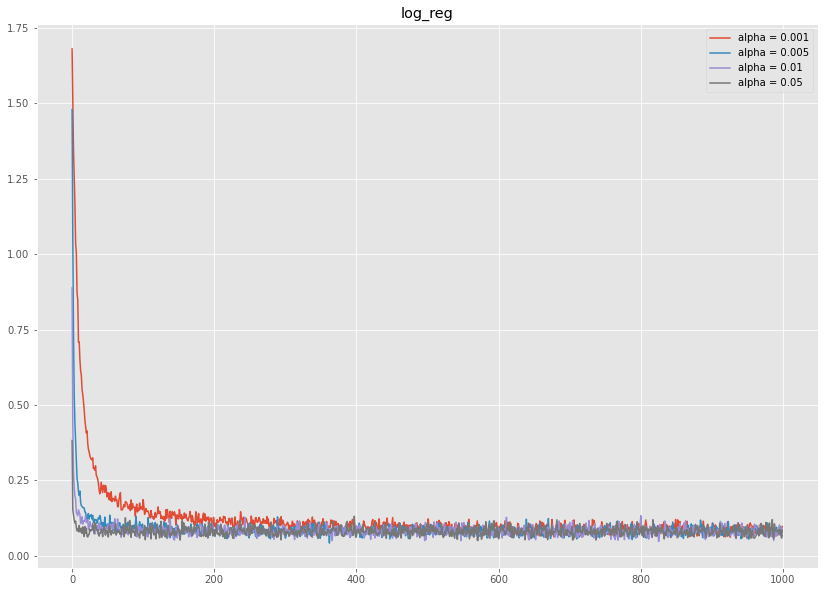

In [13]:
N = 100
alpha = [0.001, 0.005, 0.01, 0.05]
plt.figure(figsize=(14, 10))
plt.title("log_reg")
for alf in alpha:
    my_model = MySGDClassifier(batch_generator,
                               C=1000,
                               alpha=alf,
                               model_type='log_reg',
                               batch_size=10)
    my_model.fit(X, y)
    y1 = np.array(my_model.errors_log['loss']).reshape(-1, N)
    y1 = y1.mean(axis=1).ravel()
    x = np.arange(y1.shape[0])
    plt.plot(x, y1, label="alpha = {}".format(alf))
plt.legend()
plt.show()

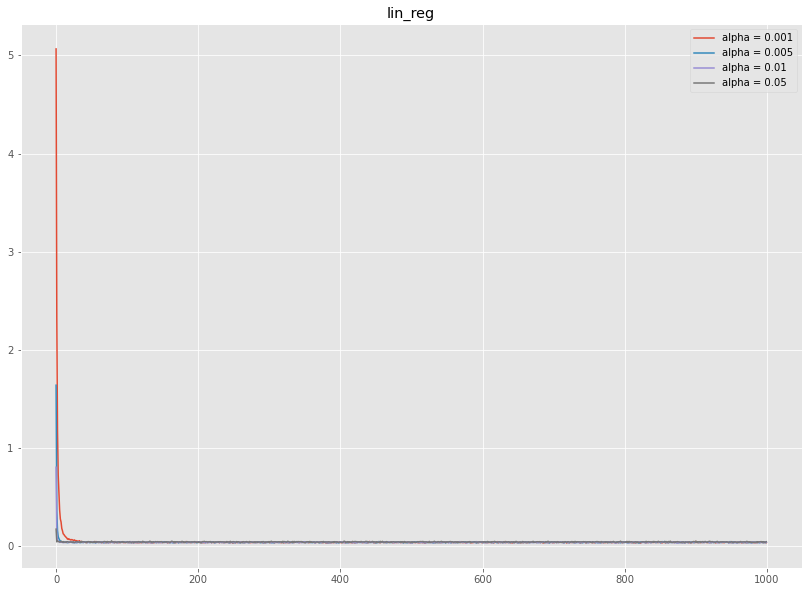

In [14]:
N = 100
alpha = [0.001, 0.005, 0.01, 0.05]
plt.figure(figsize=(14, 10))
plt.title("lin_reg")
for alf in alpha:
    my_model = MySGDClassifier(batch_generator,
                               C=1000,
                               alpha=alf,
                               model_type='lin_reg',
                               batch_size=10)
    my_model.fit(X, y)
    y1 = np.array(my_model.errors_log['loss']).reshape(-1, N)
    y1 = y1.mean(axis=1).ravel()
    x = np.arange(y1.shape[0])
    plt.plot(x, y1, label="alpha = {}".format(alf))
plt.legend()
plt.show()

Что Вы можете сказать про сходимость метода при различных `alpha`? Какое значение стоит выбирать для лучшей сходимости?

Изобразите график среднего значения весов для обеих регрессий в зависимости от коеф. регуляризации С из `np.logspace(3, -3, 10)` 

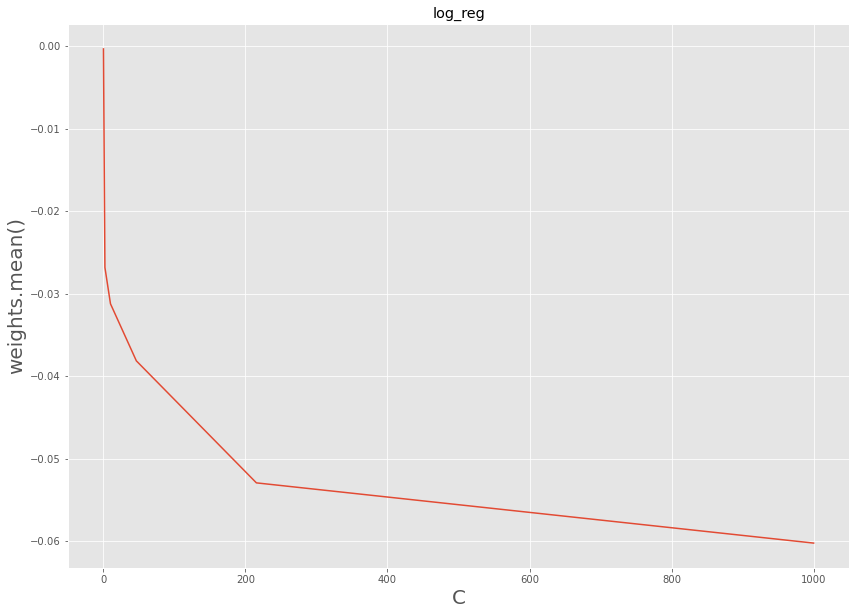

In [15]:
import warnings
warnings.filterwarnings('ignore')
wght = []
plt.figure(figsize=(14, 10))
plt.title("log_reg")
plt.xlabel("C", fontsize = 20)
plt.ylabel("weights.mean()", fontsize = 20)
for c in np.logspace(3, -3, 10):
    my_model = MySGDClassifier(batch_generator,
                               C=c,
                               alpha=0.05,
                               model_type='log_reg',
                               batch_size=10)
    my_model.fit(X, y)
    wght.append(my_model.weights.ravel().mean())
plt.plot(np.logspace(3, -3, 10), wght)
plt.show()

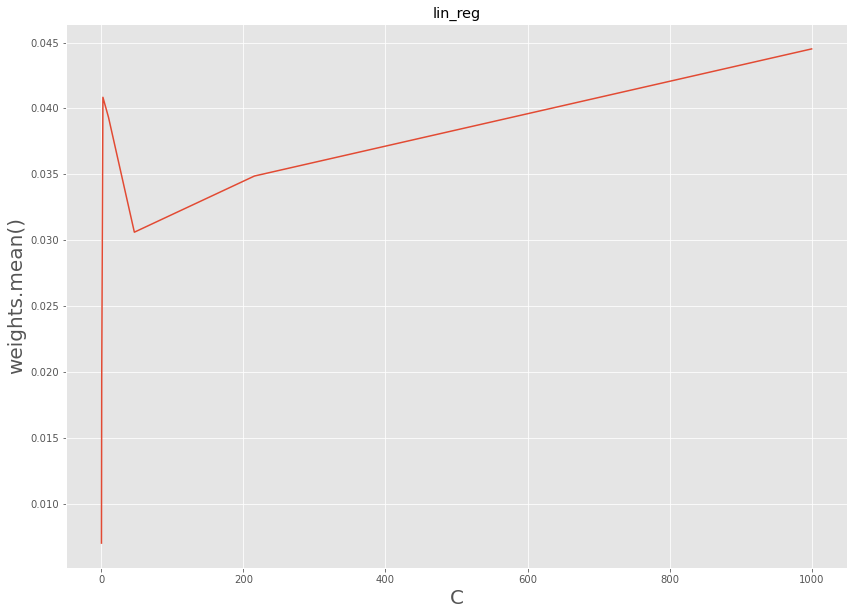

In [16]:
wght = []
plt.figure(figsize=(14, 10))
plt.title("lin_reg")
plt.xlabel("C", fontsize = 20)
plt.ylabel("weights.mean()", fontsize = 20)
for c in np.logspace(3, -3, 10):
    my_model = MySGDClassifier(batch_generator,
                               C=c,
                               alpha=0.05,
                               model_type='lin_reg',
                               batch_size=10)
    my_model.fit(X, y)
    wght.append(my_model.weights.ravel().mean())
plt.plot(np.logspace(3, -3, 10), wght)
plt.show()

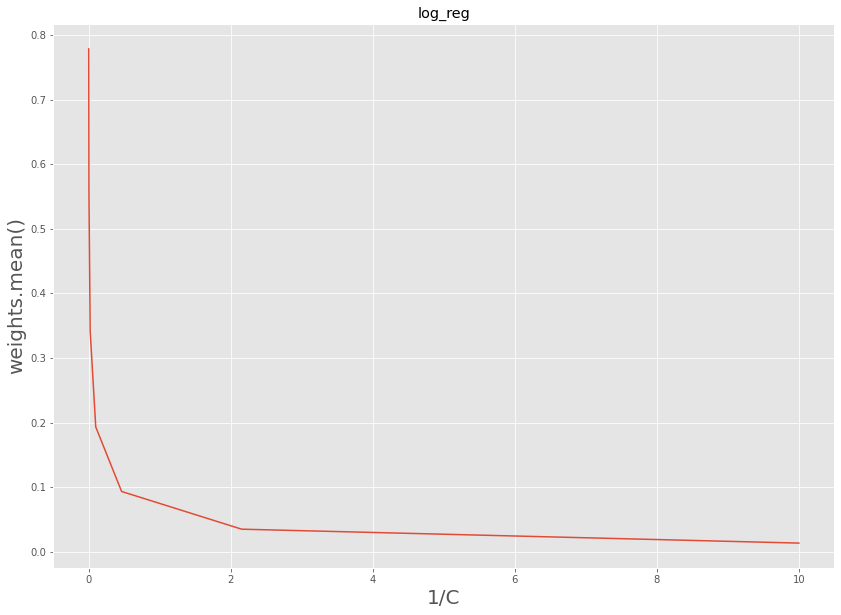

In [17]:
wght = []
plt.figure(figsize=(14, 10))
plt.title("log_reg")
plt.xlabel("1/C", fontsize = 20)
plt.ylabel("weights.mean()", fontsize = 20)
for c in np.logspace(3, -3, 10):
    my_model = MySGDClassifier(batch_generator,
                               C=1/c,
                               alpha=0.05,
                               model_type='log_reg',
                               batch_size=10)
    my_model.fit(X, y)
    wght.append(np.absolute(my_model.weights.ravel()).mean())
plt.plot(np.logspace(3, -3, 10), wght)
plt.show()

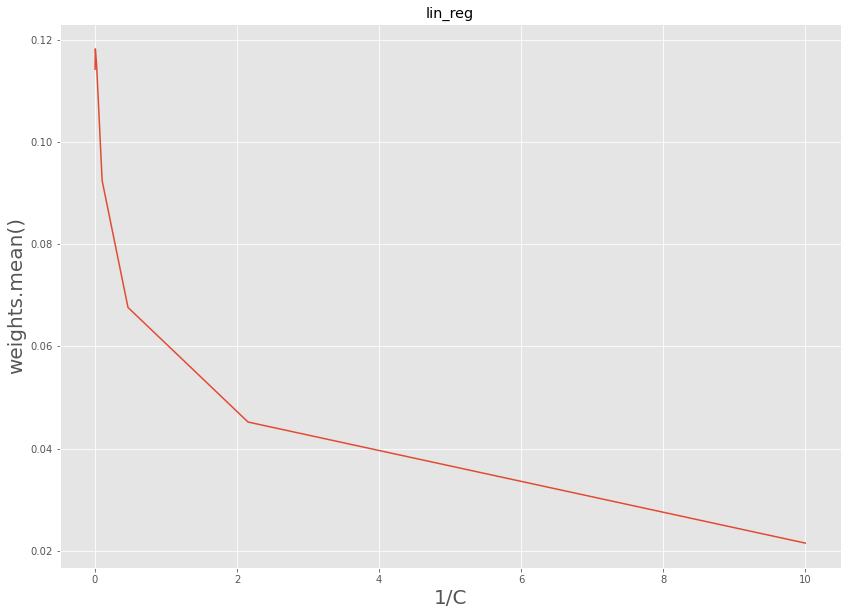

In [18]:
wght = []
plt.figure(figsize=(14, 10))
plt.title("lin_reg")
plt.xlabel("1/C", fontsize = 20)
plt.ylabel("weights.mean()", fontsize = 20)
for c in np.logspace(3, -3, 10):
    my_model = MySGDClassifier(batch_generator,
                               C=1/c,
                               alpha=0.05,
                               model_type='lin_reg',
                               batch_size=10)
    my_model.fit(X, y)
    wght.append(np.absolute(my_model.weights.ravel()).mean())
plt.plot(np.logspace(3, -3, 10), wght)
plt.show()

Довольны ли Вы, насколько сильно уменьшились Ваши веса? 

# Боевое применение (4  балла)

**Защита данной части возможна только при преодолении в проекте бейзлайна Handmade baseline.**

Давайте применим модель на итоговом проекте! Датасет сделаем точно таким же образом, как было показано в project_overview.ipynb

Применим обе регрессии, подберем для них параметры и сравним качество. Может быть Вы еще одновременно с решением домашней работы подрастете на лидерборде!

In [19]:
doc_to_title = {}
with open('docs_titles.tsv', encoding='utf-8') as f:
    for num_line, line in enumerate(f):
        if num_line == 0:
            continue
        data = line.strip().split('\t', 1)
        doc_id = int(data[0])
        if len(data) == 1:
            title = ''
        else:
            title = data[1]
        doc_to_title[doc_id] = title
print (len(doc_to_title))


28026


In [20]:
import pandas as pd
train_data = pd.read_csv('train_groups.csv')
traingroups_titledata = {}
for i in range(len(train_data)):
    new_doc = train_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    target = new_doc['target']
    title = doc_to_title[doc_id]
    if doc_group not in traingroups_titledata:
        traingroups_titledata[doc_group] = []
    traingroups_titledata[doc_group].append((doc_id, title, target))

In [21]:
import numpy as np
y_train = []
X_train = []
groups_train = []
for new_group in traingroups_titledata:
    docs = traingroups_titledata[new_group]
    for k, (doc_id, title, target_id) in enumerate(docs):
        y_train.append(target_id)
        groups_train.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j, target_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_train.append(sorted(all_dist, reverse=True)[0:15]    )
X_train = np.array(X_train)
y_train = np.array(y_train)
groups_train = np.array(groups_train)
print (X_train.shape, y_train.shape, groups_train.shape)

(11690, 15) (11690,) (11690,)


Подберите размер батча для обучения. Линейная модель не должна учиться дольше нескольких минут. 

Не забывайте использовать скейлер!

In [22]:
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [23]:
from time import time
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [24]:
batches = [1, 10, 100, 500, 1000, 2000, 5000, 10000]
for btc in batches: 
    my_model = MySGDClassifier(batch_generator,
                               C=1000,
                               alpha=0.05,
                               model_type='log_reg',
                               batch_size=btc)
    t1 = time()
    my_model.fit(X_train, y_train)
    t2 = time()
    print("batch_size = ", btc, " ", "time = ", (t2-t1)/60)

batch_size =  1   time =  0.317200764020284
batch_size =  10   time =  0.0742890199025472
batch_size =  100   time =  0.038458104928334555
batch_size =  500   time =  0.03375714222590129
batch_size =  1000   time =  0.03187857071558634
batch_size =  2000   time =  0.02691549857457479
batch_size =  5000   time =  0.03013054927190145
batch_size =  10000   time =  0.029982872804005942


Разбейте данные на обучение и валидацию. Подберите параметры C, alpha, max_epoch, model_type на валидации (Вы же помните, как правильно в этой задаче делать валидацию?)

In [25]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
C1 = [1, 10, 100, 1000, 10000]
alpha1 = [0.001, 0.01, 0.05, 0.1]
max_epoch = [1, 5, 10, 20]
model_type = ['lin_reg', 'log_reg']
kf = KFold(n_splits=10)
main_res = dict()

In [26]:
for c in C1:
    for alf in alpha1:
        for ep in max_epoch:
            for md in model_type:
                result = 0
                for train, test in kf.split(X_train, y_train):
                    my_model = MySGDClassifier(batch_generator,
                                               C=c,
                                               alpha=alf,
                                               max_epoch=ep,
                                               model_type=md,
                                               batch_size=1000)
                    my_model.fit(X_train[train], y_train[train])
                    temp = my_model.predict(X_train[test])
                    result += roc_auc_score(y_train[test], temp)
                result = result/10
                main_res[result] = dict()
                main_res[result]['C'] = c
                main_res[result]['alpha'] = alf
                main_res[result]['max_epoch'] = ep
                main_res[result]['model_type'] = md

In [27]:
main_res[max(main_res)]

{'C': 1000, 'alpha': 0.05, 'max_epoch': 1, 'model_type': 'log_reg'}

Подберите порог линейной модели, по достижении которого, Вы будете относить объект к классу 1. Вспомните, какую метрику мы оптимизируем в соревновании.  Как тогда правильно подобрать порог?

In [28]:
tres = [x/10 for x in range(2, 10)]
for tr in tres:
    res = 0
    for train, test in kf.split(X_train, y_train):
        my_model = MySGDClassifier(batch_generator,
                                   C=100,
                                   alpha=0.001,
                                   max_epoch=20,
                                   model_type='log_reg',
                                   batch_size=1000)
        my_model.fit(X_train[train], y_train[train])
        temp = my_model.predict(X_train[test])
        result += f1_score(y_train[test], temp > tr)
    result = result/10
    print("treshold = ", tr, " score = ", result)

treshold =  0.2  score =  0.6497032910639181
treshold =  0.3  score =  0.6366226348220546
treshold =  0.4  score =  0.6418908839690614
treshold =  0.5  score =  0.6437078566406075
treshold =  0.6  score =  0.6469858883067783
treshold =  0.7  score =  0.6453276681581235
treshold =  0.8  score =  0.646146619221199
treshold =  0.9  score =  0.6410235230481486


С лучшими параметрами на валидации сделайте предсказание на тестовом множестве, отправьте его на проверку на платформу kaggle. Убедитесь, что Вы смогли побить public score первого бейзлайна.

** При сдаче домашки Вам необходимо кроме ссылки на ноутбук показать Ваш ник на kaggle, под которым Вы залили решение, которое побило Handmade baseline. **

In [29]:
test_data = pd.read_csv('test_groups.csv')
testgroups_titledata = {}
for i in range(len(test_data)):
    new_doc = test_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    title = doc_to_title[doc_id]
    if doc_group not in testgroups_titledata:
        testgroups_titledata[doc_group] = []
    testgroups_titledata[doc_group].append((doc_id, title))
X_test = []
groups_test = []
for new_group in testgroups_titledata:
    docs = testgroups_titledata[new_group]
    for k, (doc_id, title) in enumerate(docs):
        groups_test.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j= docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_test.append(sorted(all_dist, reverse=True)[0:15]    )
X_test = np.array(X_test)
groups_test = np.array(groups_test)
print (X_test.shape, groups_test.shape)

(16627, 15) (16627,)


In [30]:
scaler = StandardScaler()
X_test = scaler.fit_transform(X_test)

In [31]:
my_model = MySGDClassifier(batch_generator,
                           C=100,
                           alpha=0.001,
                           max_epoch=20,
                           model_type='log_reg',
                           batch_size=1000)
my_model.fit(X_train, y_train)
pred = my_model.predict(X_test)
test_data["target"] = pd.Series(np.array((pred>0.7),dtype = int))
with open("res4.csv", "w") as f:
    f.write(test_data.to_csv(columns=("pair_id", "target"), index=False))

In [32]:
test_data

,pair_id,group_id,doc_id,target
0,11691,130,6710,0
1,11692,130,4030,1
2,11693,130,5561,1
3,11694,130,4055,1
4,11695,130,4247,1
...,...,...,...,...
16622,28313,309,16637,0
16623,28314,309,16759,0
16624,28315,309,15358,1
16625,28316,309,17287,1


# Фидбек (бесценно)

* Какие аспекты обучения линейных моделей Вам показались непонятными? Какое место стоит дополнительно объяснить?

***Ваше ответ здесь***

* Здесь Вы можете оставить отзыв о этой домашней работе или о всем курсе.   

*** ВАШ ОТЗЫВ ЗДЕСЬ***

Очень сложно, но интересно. Написание своих реализаций моделей позволяет глубже их прочувствовать, а также прокачать скиллы в
питоне, особенно в матричных вычислениях в numpy.